In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# STOP WORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer

import string
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

from function import cleaning_tweet, model_evaluate, plot_confusion_matrix, display_word_cloud

english_punctuations = string.punctuation
punctuations_list = english_punctuations

#remove stopwords 
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/habbi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read and Load the Dataset

In [10]:
df = pd.read_csv('../data/tweet_emotions.csv')
#display(df)

## Data Analysis

In [11]:
df.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [12]:
# null value check
np.sum(df.isnull().any(axis=1))

0

In [13]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   3
Count of rows in the data is:   40000


# Data Visualization

[Text(0, 0, 'empty'),
 Text(1, 0, 'sadness'),
 Text(2, 0, 'enthusiasm'),
 Text(3, 0, 'neutral'),
 Text(4, 0, 'worry'),
 Text(5, 0, 'surprise'),
 Text(6, 0, 'love'),
 Text(7, 0, 'fun'),
 Text(8, 0, 'hate'),
 Text(9, 0, 'happiness'),
 Text(10, 0, 'boredom'),
 Text(11, 0, 'relief'),
 Text(12, 0, 'anger')]

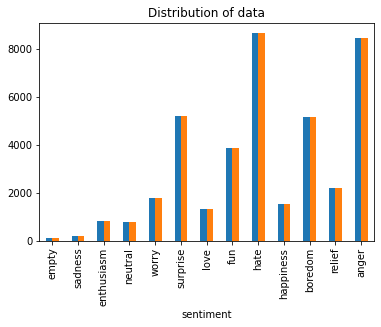

In [14]:
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(df['sentiment'].unique(), rotation=90)

# Data Preprocessing&nbsp;

In [15]:
# data qu'on veut analyser
data_preprocessed = df[['content','sentiment']]
data_preprocessed = data_preprocessed[data_preprocessed.sentiment != "empty"]

In [16]:
# remove stop word
data_preprocessed['content'] = data_preprocessed['content'].apply(lambda text: cleaning_tweet(text))

In [17]:
# replace sentiment with numbers
sentiment_to_number = {
    'boredom' : 4,
    'sadness': 3 ,
    'worry' : 2,
    'hate' : 1,
    'anger' : 0,
    'neutral' : 5,
    'enthusiasm' : 7,
    'surprise' : 8,
    'love' : 9,
    'fun' : 7,
    'happiness' : 7,    
    'relief' : 6
}

data_preprocessed['sentiment'] = data_preprocessed['sentiment'].replace(to_replace = sentiment_to_number)

In [18]:
display(data_preprocessed)

,content,sentiment
1,layin n bed headache ughhhhwaitin call,3
2,funeral ceremonygloomy friday,3
3,wants hang friends soon,7
4,dannycastillo we want trade someone houston ti...,5
5,repinging ghostridah14 didnt go prom bc bf did...,2
...,...,...
39995,johnlloydtaylor,5
39996,happy mothers day all love,9
39997,happy mothers day mommies woman man long youre...,9
39998,niariley wassup beautiful follow me peep out m...,7


In [39]:
# input feature (X) = content and label (Y) = sentiment
X = data_preprocessed['content'].astype(str)
y = data_preprocessed['sentiment']

## Train and Test sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =3455)

In [41]:
print (X_test)

30076    ['salioelsol08', 'haha', 'def', 'rob', 'bank',...
6070     ['playing', 'guitar', 'hero', 'let', 'steam', ...
3512              ['doing', 'accounts', 'revision', 'boo']
13459    ['answering', 'detailed', 'questions', 'via', ...
1276     ['watching', 'jay', 'lenos', '2nd', 'last', 't...
                               ...                        
25875    ['sotwitterpated', 'hi', 'yeah', 'im', 'fine',...
7096     ['autisminsights', 'laundry', 'instead', 'sitt...
32992                               ['dollg1974', 'thank']
18990                 ['nursing', 'sore', 'back', 'today']
2778     ['weather', 'may', 'makes', 'cause', 'temp', '...
Name: content, Length: 1959, dtype: object


## TF-IDF Vectorizer

In [42]:
vectorizer= TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [43]:
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  253638


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## MODEL BUILDING

### Bernouilli

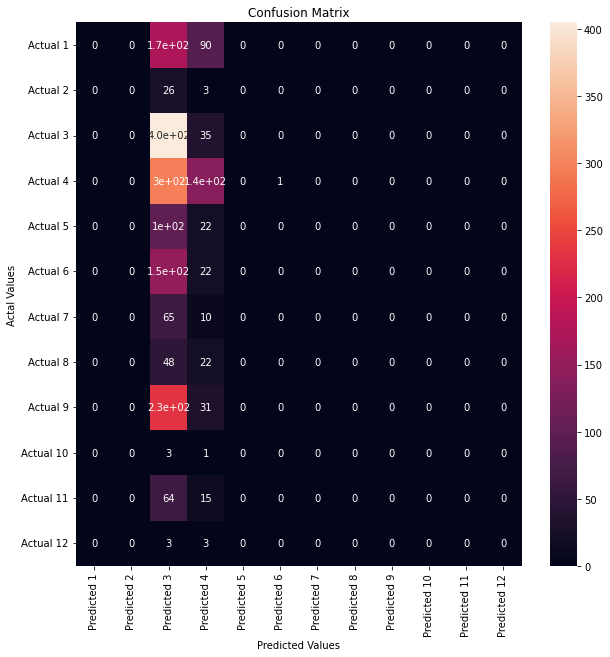

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred1 = model_evaluate(BNBmodel)

# confusion matrix 
plot_confusion_matrix(y_test, y_pred1)

### SVM

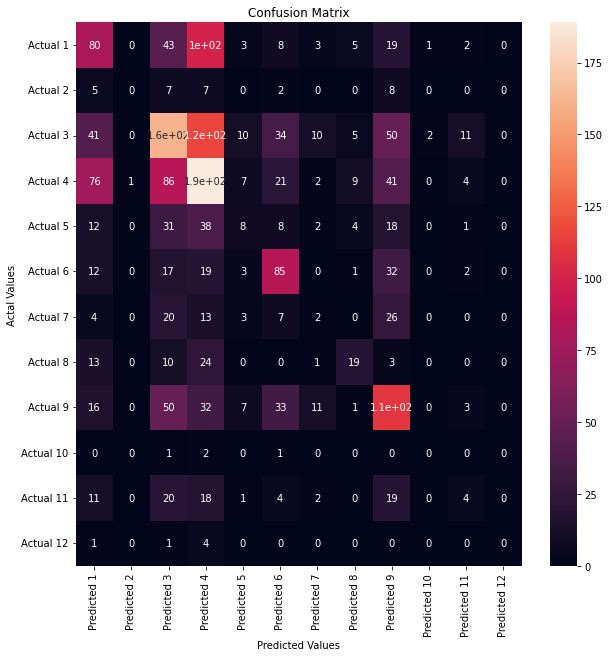

None

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

# confusion matrix 
display(plot_confusion_matrix(y_test, y_pred2))

### Logistic Regression

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)


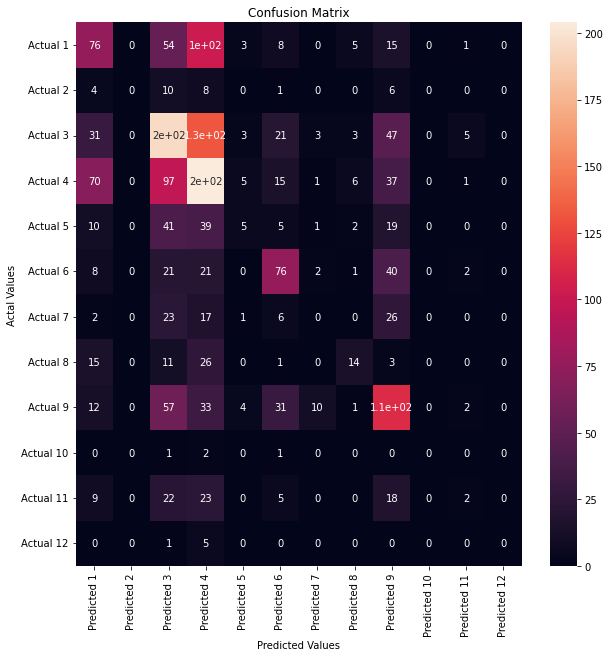

None

In [ ]:
# confusion matrix 
plot_confusion_matrix(y_test, y_pred3)

# Word cloud

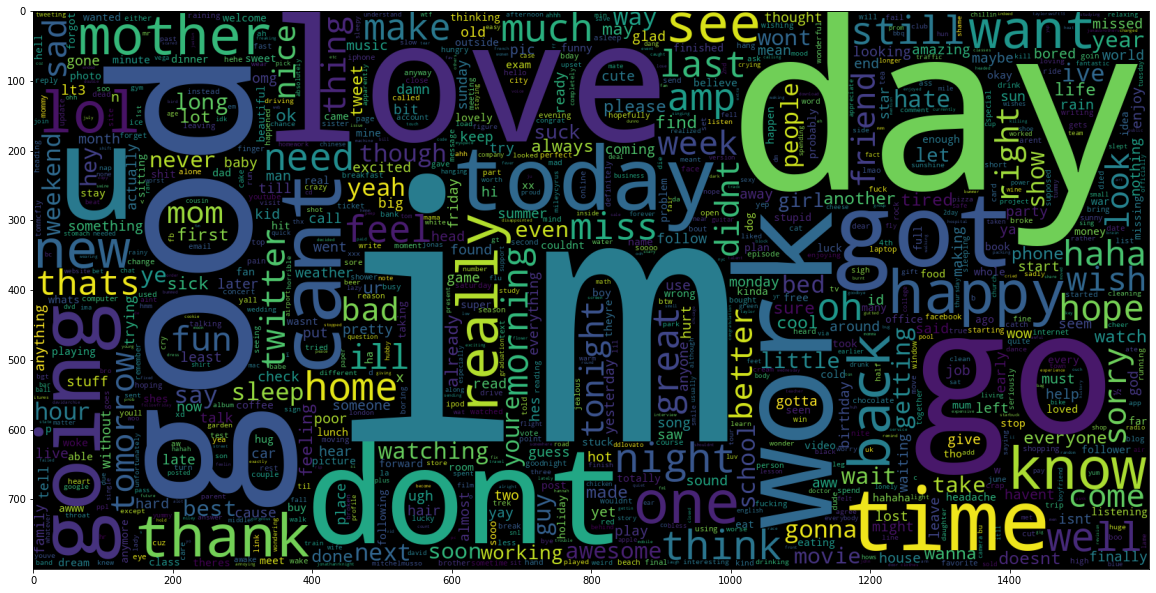

In [20]:
data_test = data_preprocessed['content'][:40000]
df_sadness = data_preprocessed[data_preprocessed['sentiment'] == "sadness"]
df_hate = data_preprocessed[data_preprocessed['sentiment']=='hate']
df_worry = data_preprocessed[data_preprocessed['sentiment']=='worry']
df_love = data_preprocessed[data_preprocessed['sentiment']=='love']
data_sadness = df_sadness['content'][:10000]
data_hate = df_hate['content'][:10000]
data_worry = df_worry['content'][:10000]
data_love = df_love['content'][:10000]


display_word_cloud(data_test)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e9a271ec-2e6a-48cd-95e1-869b203be896' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [29]:
    wc = WordCloud(
        max_words = 1000,
        width = 400, 
        height = 300,
        collocations = False).generate(" ".join(data_test))

    plt.figure(figsize = (400,300))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

    # store to file
    plt.savefig("./img/wordcloud.png", format="png")
    plt.show()